In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Creating a photo generator from the files

In [5]:
# create a data generator
datagen = ImageDataGenerator()

# load and iterate training dataset
train_it = datagen.flow_from_directory('data/clean-dirty-garbage-containers/train/', class_mode='binary', batch_size=64)

# load and iterate test dataset
test_it = datagen.flow_from_directory('data/clean-dirty-garbage-containers/test/', class_mode='binary', batch_size=64)

Found 938 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [6]:
def plot_clean_and_dirty_photos(train_it, num_pictures=3):
    """
    plot clean and dirty cans from the train labeled data
    the number of pictures will define how much to present in the 
    same time in a matter of rows
    """
    photos, labels = next(train_it)
    clean_id = np.where(labels == 0)[0][:num_pictures]
    dirty_id = np.where(labels == 1)[0][:num_pictures]
    
    fig, ax = plt.subplots(num_pictures, 2, figsize=(12, num_pictures * 3))
    
    for row in range(num_pictures):
        ax[row][0].imshow(photos[clean_id[row]].astype("int"))
        ax[row][0].set_title("clean")

        ax[row][1].imshow(photos[dirty_id[row]].astype("int"))
        ax[row][1].set_title("dirty")
    
    plt.tight_layout()
    plt.show()

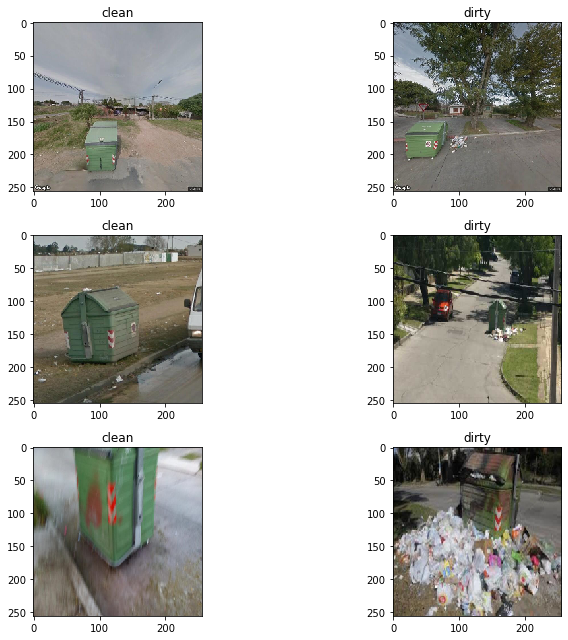

In [7]:
plot_clean_and_dirty_photos(train_it, 3)

example

In [8]:
train_it_all = datagen.flow_from_directory('data/clean-dirty-garbage-containers/train/', class_mode='binary')
test_it_all = datagen.flow_from_directory('data/clean-dirty-garbage-containers/test/', class_mode='binary')

Found 938 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [8]:
#for element in train_it_all:
#    photo, label = element
#    try:
#        print(photo.shape)
#    except:
        

### Image classification model

In [9]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
input_shape = (256,256,3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 516128)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                33032256  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [16]:
train_it = datagen.flow_from_directory('data/clean-dirty-garbage-containers/train/', class_mode='binary', batch_size=64)
val_it = datagen.flow_from_directory('data/clean-dirty-garbage-containers/test/', class_mode='binary', batch_size=64)

Found 938 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [18]:
batch_size = 64
epochs = 3

history = model.fit_generator(
                                train_it,
                                steps_per_epoch = 938//batch_size,
                                epochs=epochs,
                                validation_data=val_it,
                                validation_steps=196 // batch_size)

Epoch 1/3
14/14 [==============================] - 12s 878ms/step - loss: 0.6685 - accuracy: 0.6293 - val_loss: 0.6339 - val_accuracy: 0.6042
Epoch 2/3
14/14 [==============================] - 13s 895ms/step - loss: 0.6500 - accuracy: 0.6522 - val_loss: 0.5868 - val_accuracy: 0.6823
Epoch 3/3
14/14 [==============================] - 13s 895ms/step - loss: 0.6541 - accuracy: 0.6670 - val_loss: 0.6096 - val_accuracy: 0.7656


In [19]:
def plot_loss(history):
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    ax.plot(history.history['loss'], color='b', label="Training loss")
    ax.plot(history.history['val_loss'], color='r', label="validation loss")
    ax.set_title("Loss over epoches")
    legend = ax.legend(loc='best', shadow=True)

    plt.tight_layout()
    plt.show()

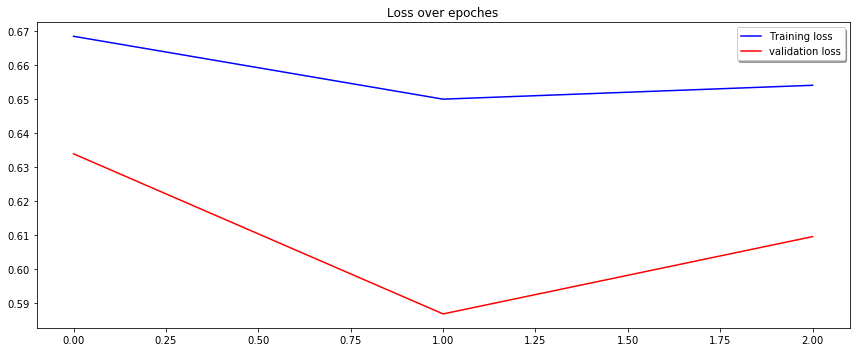

In [20]:
plot_loss(history)

CNN exercise - model

In [30]:
input_shape = (256,256,3)

model2 = Sequential()
model2.add(Conv2D(64, 3,  input_shape=input_shape, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(64, 3, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(64, 3, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1))

In [31]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)            

In [35]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
batch_size = 64
epochs = 100

history2 = model2.fit_generator(
                                train_it,
                                steps_per_epoch = 938//batch_size,
                                epochs=epochs,
                                validation_data=val_it,
                                validation_steps=196 // batch_size)

Epoch 1/3
14/14 [==============================] - 39s 3s/step - loss: 9.3519 - accuracy: 0.3867 - val_loss: 7.7835 - val_accuracy: 0.4896
Epoch 2/3
14/14 [==============================] - 39s 3s/step - loss: 9.3345 - accuracy: 0.3879 - val_loss: 7.7835 - val_accuracy: 0.4896
Epoch 3/3
14/14 [==============================] - 40s 3s/step - loss: 9.3946 - accuracy: 0.3839 - val_loss: 7.7835 - val_accuracy: 0.4896


In [37]:
def plot_loss(history):
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    ax.plot(history.history['loss'], color='b', label="Training loss")
    ax.plot(history.history['val_loss'], color='r', label="validation loss")
    ax.set_title("Loss over epoches")
    legend = ax.legend(loc='best', shadow=True)

    plt.tight_layout()
    plt.show()

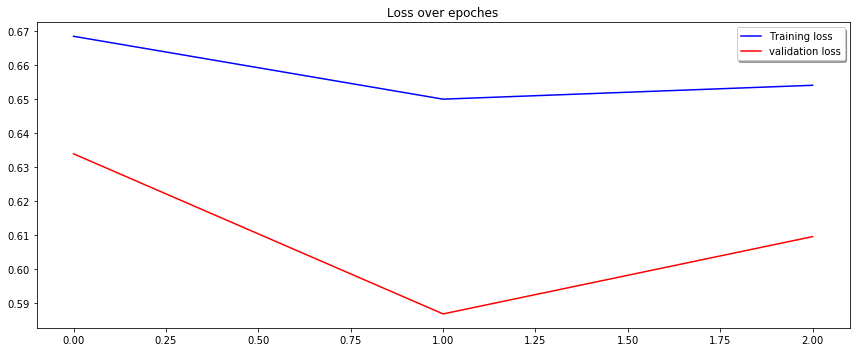

In [38]:
plot_loss(history)